In [1]:
# Mount Google Driv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


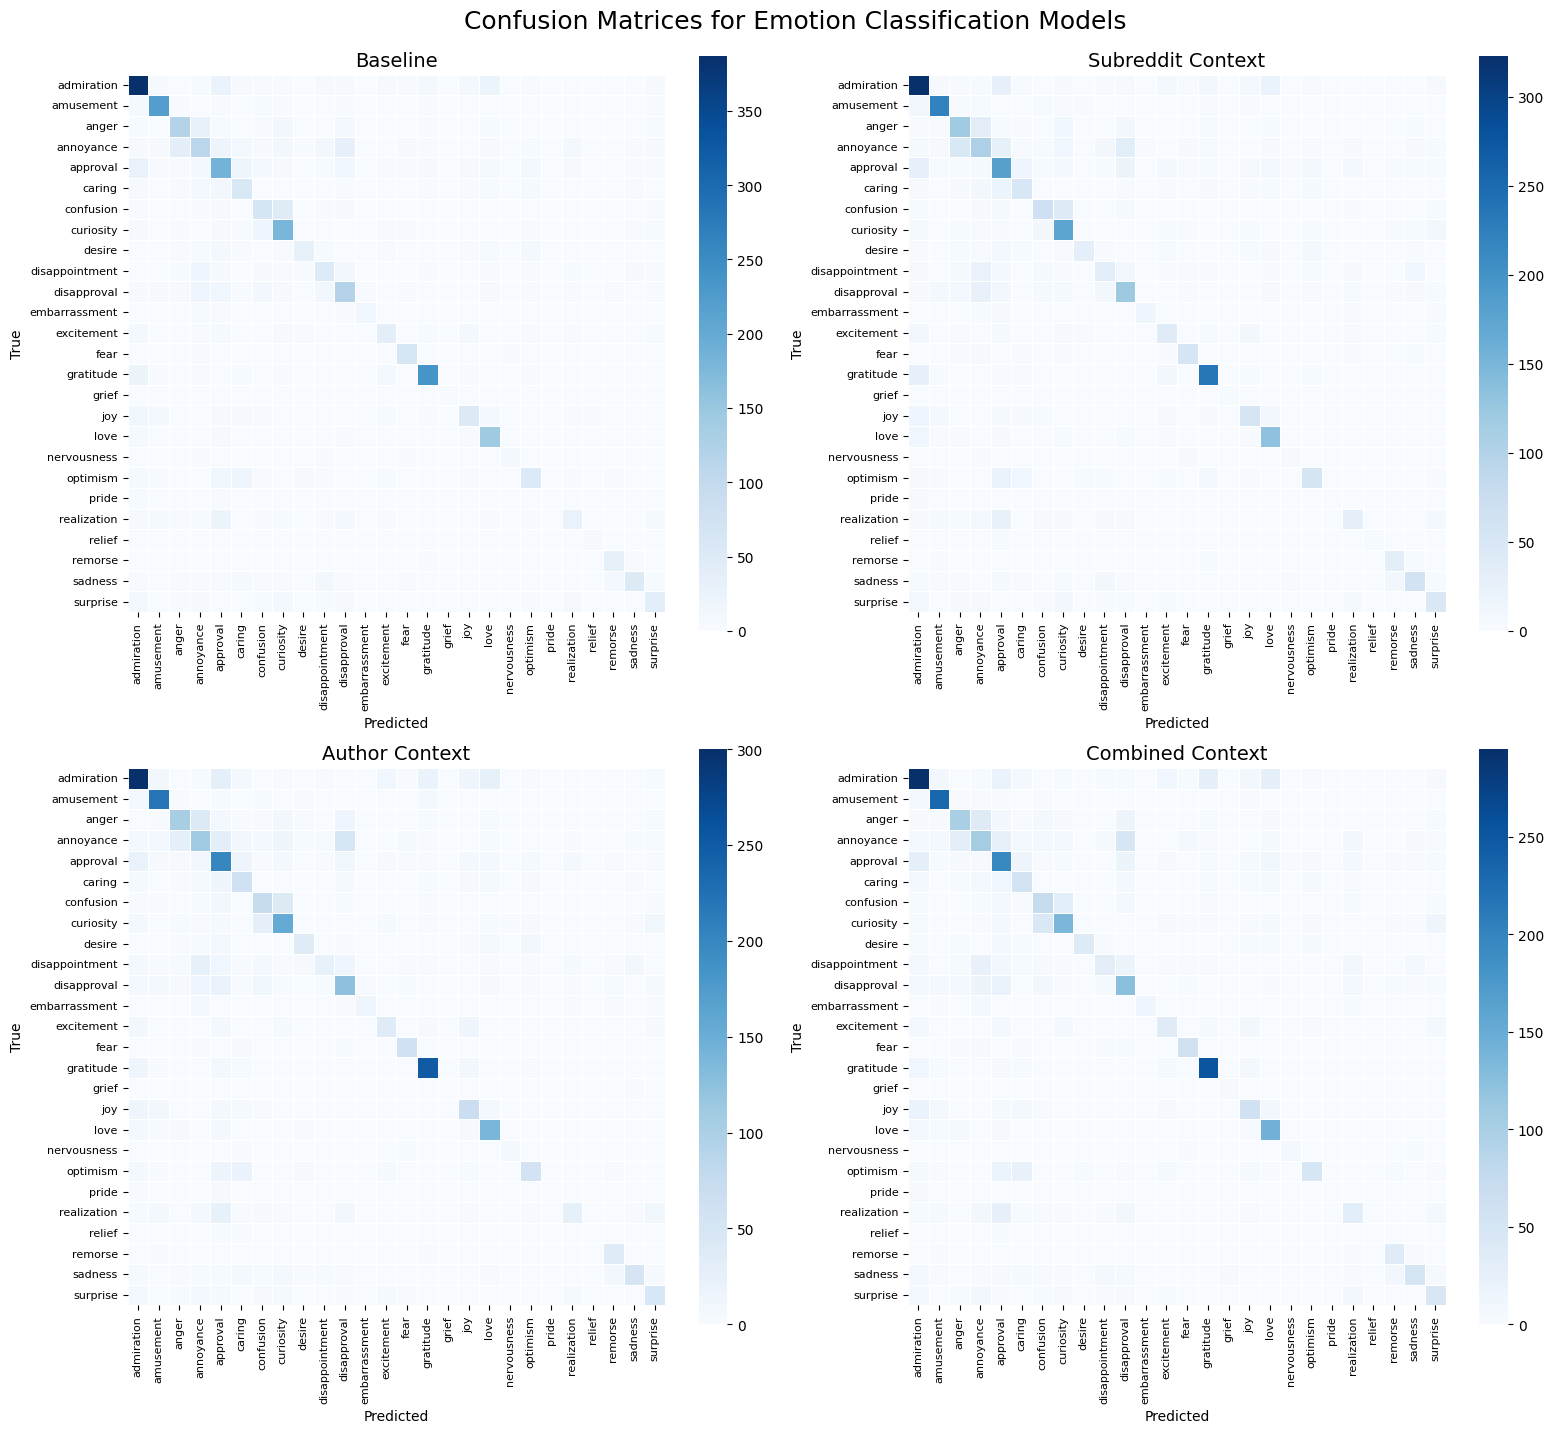

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
files = {
    "Baseline": "drive/MyDrive/266_final_project/best_model/confusion_matrix_bl.csv",
    "Subreddit Context": "drive/MyDrive/266_final_project/best_model/confusion_matrix_subreddit.csv",
    "Author Context": "drive/MyDrive/266_final_project/best_model/confusion_matrix_author.csv",
    "Combined Context": "drive/MyDrive/266_final_project/best_model/confusion_matrix_combined.csv"
}

# Plot setup
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

# For consistent color scaling across all heatmaps
vmin, vmax = 0, None  # Optionally set vmax to highest cell count across all CSVs

for ax, (title, filepath) in zip(axes, files.items()):
    df = pd.read_csv(filepath, index_col=0)  # assumes label names are in first column and header
    sns.heatmap(df, ax=ax, cmap="Blues", cbar=True, square=True, linewidths=0.5,
                xticklabels=True, yticklabels=True, vmin=vmin, vmax=vmax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.suptitle("Confusion Matrices for Emotion Classification Models", fontsize=18, y=1.02)
plt.show()

####Bar Chart: Macro F1-Scores for All Model Variants

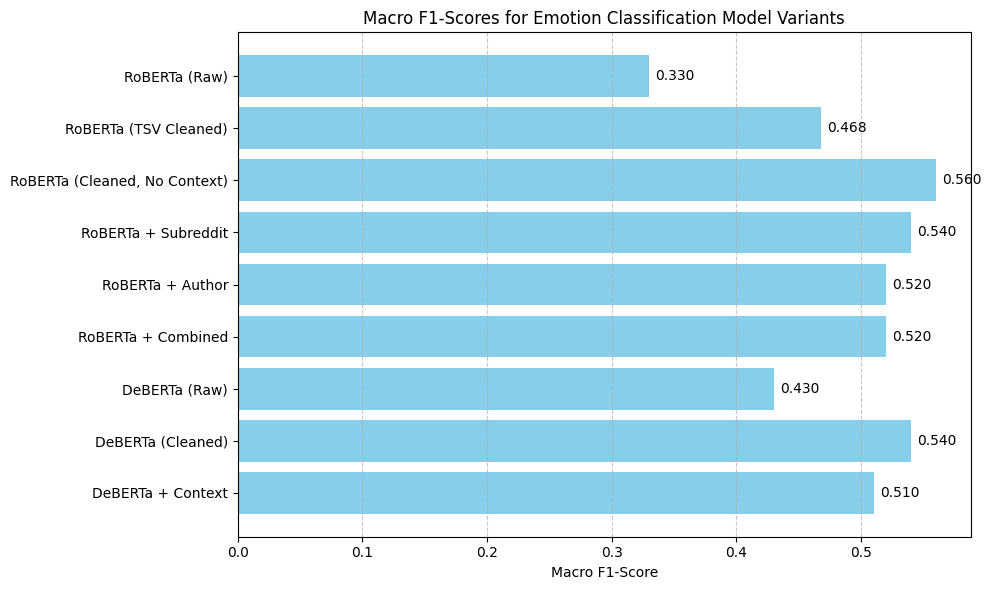

In [ ]:
import matplotlib.pyplot as plt

# Define the model variants and their actual macro F1-scores
model_variants = {
    "RoBERTa (Raw)": 0.33,
    "RoBERTa (TSV Cleaned)": 0.468,
    "RoBERTa (Cleaned, No Context)": 0.56,
    "RoBERTa + Subreddit": 0.54,
    "RoBERTa + Author": 0.52,
    "RoBERTa + Combined": 0.52,
    "DeBERTa (Raw)": 0.43,
    "DeBERTa (Cleaned)": 0.54,
    "DeBERTa + Context": 0.51
}

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(list(model_variants.keys()), list(model_variants.values()), color='skyblue')
plt.xlabel("Macro F1-Score")
plt.title("Macro F1-Scores for Emotion Classification Model Variants")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with scores
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', va='center')

plt.tight_layout()

# Save as both PNG and PDF
plt.savefig("f1_scores_chart.png", dpi=300, bbox_inches='tight')
plt.savefig("f1_scores_chart.pdf", bbox_inches='tight')

plt.show()


 #### Table:

In [ ]:
import pandas as pd

# Define model results
data = {
    "Model Variant": [
        "RoBERTa Text-Only (Raw)",
        "RoBERTa Text-Only (TSV Cleaned)",
        "RoBERTa Text-Only (Cleaned)",
        "RoBERTa + Subreddit Context",
        "RoBERTa + Author Embedding",
        "RoBERTa + Subreddit + Author (Combined)",
        "DeBERTa Text-Only (Raw)",
        "DeBERTa Text-Only (Cleaned)",
        "DeBERTa + Context"
    ],
    "Macro F1-Score": [0.33, 0.468, 0.56, 0.54, 0.52, 0.52, 0.43, 0.54, 0.51]
}

df_scores = pd.DataFrame(data)
df_scores.style.highlight_max(axis=0, color='lightgreen')



,Model Variant,Macro F1-Score
0,RoBERTa Text-Only (Raw),0.330000
1,RoBERTa Text-Only (TSV Cleaned),0.468000
2,RoBERTa Text-Only (Cleaned),0.560000
3,RoBERTa + Subreddit Context,0.540000
4,RoBERTa + Author Embedding,0.520000
5,RoBERTa + Subreddit + Author (Combined),0.520000
6,DeBERTa Text-Only (Raw),0.430000
7,DeBERTa Text-Only (Cleaned),0.540000
8,DeBERTa + Context,0.510000


#### Option 2: Plot as a Table Below the Chart

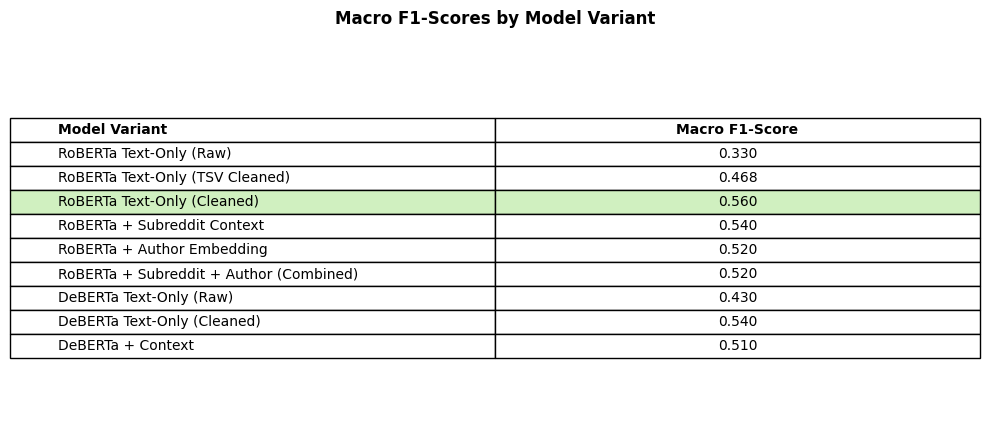

In [ ]:
import matplotlib.pyplot as plt

# Re-define your data
model_variants = [
    "RoBERTa Text-Only (Raw)",
    "RoBERTa Text-Only (TSV Cleaned)",
    "RoBERTa Text-Only (Cleaned)",
    "RoBERTa + Subreddit Context",
    "RoBERTa + Author Embedding",
    "RoBERTa + Subreddit + Author (Combined)",
    "DeBERTa Text-Only (Raw)",
    "DeBERTa Text-Only (Cleaned)",
    "DeBERTa + Context"
]
f1_scores = [0.33, 0.468, 0.56, 0.54, 0.52, 0.52, 0.43, 0.54, 0.51]

# Create the table plot
fig, ax = plt.subplots(figsize=(10, 4.5))
ax.axis('off')

# Build table
table_data = list(zip(model_variants, [f"{score:.3f}" for score in f1_scores]))
table = plt.table(cellText=table_data,
                  colLabels=["Model Variant", "Macro F1-Score"],
                  colLoc='center',
                  cellLoc='center',
                  loc='center')

# Bold headers and align first column left
for i in range(len(model_variants) + 1):  # +1 includes header
    table[i, 0].get_text().set_ha('left')
    if i == 0:
        table[i, 0].get_text().set_fontweight('bold')
        table[i, 1].get_text().set_fontweight('bold')

# Style and highlight best model
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.0, 1.3)

best_idx = f1_scores.index(max(f1_scores)) + 1
for col in range(2):
    table[best_idx, col].set_facecolor('#d0f0c0')

# Title
plt.title("Macro F1-Scores by Model Variant", fontweight='bold', pad=16)
plt.tight_layout()

# ✅ Save to PNG and PDF
plt.savefig("macro_f1_table.png", dpi=300, bbox_inches='tight')
plt.savefig("macro_f1_table.pdf", bbox_inches='tight')

plt.show()


#### Full Code to Load and Plot RoBERTa + Combined F1 from Excel

In [ ]:
# Mount Google Driv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
xlsx_path = "/content/drive/MyDrive/emotion-project/plots for paper/emotion_classification_report_all.xlsx"



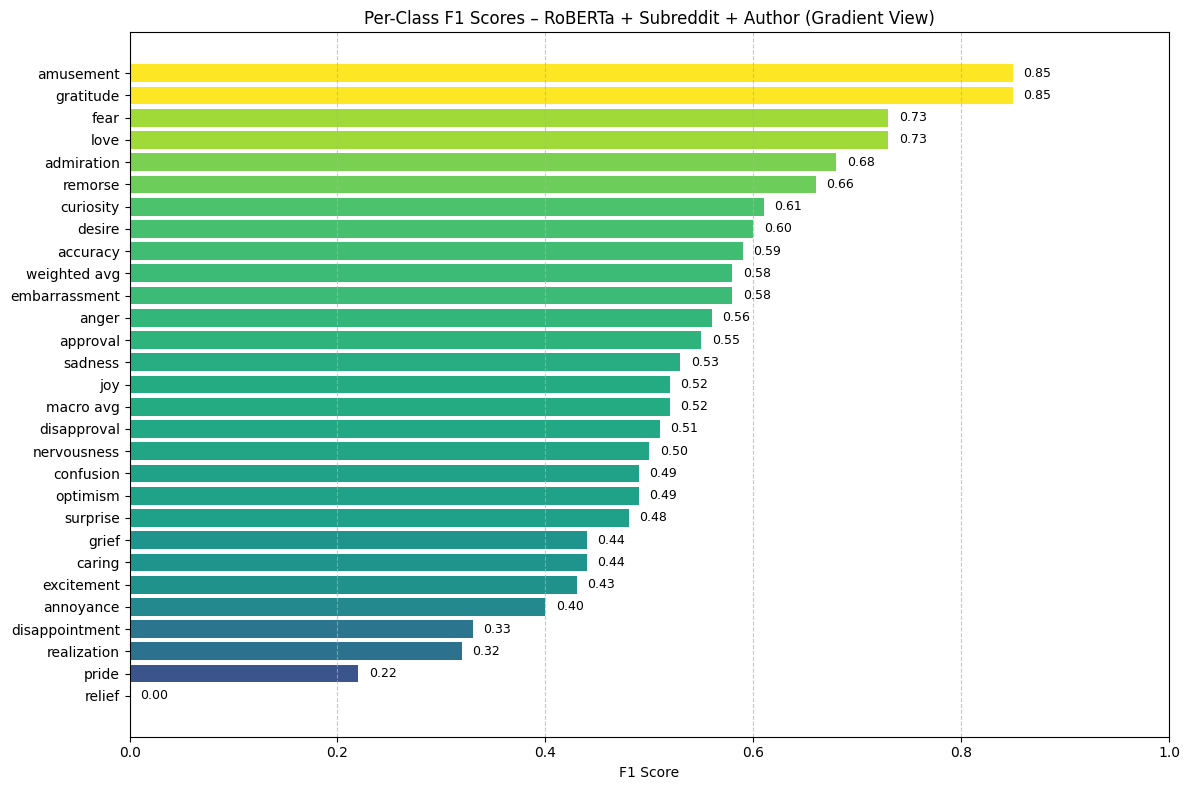

In [ ]:
# Save the gradient bar chart for per-class F1 scores as both PNG and PDF

# Normalize F1 scores for color mapping
norm = plt.Normalize(df_combined_f1['f1_score'].min(), df_combined_f1['f1_score'].max())
colors = plt.cm.viridis(norm(df_combined_f1['f1_score'].values))

# Plot with gradient colors
plt.figure(figsize=(12, 8))
bars = plt.barh(df_combined_f1['emotion'], df_combined_f1['f1_score'], color=colors)
plt.xlabel("F1 Score")
plt.title("Per-Class F1 Scores – RoBERTa + Subreddit + Author (Gradient View)")
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', fontsize=9)

plt.tight_layout()

# Save as PNG and PDF
plt.savefig("per_class_f1_gradient.png", dpi=300, bbox_inches='tight')
plt.savefig("per_class_f1_gradient.pdf", bbox_inches='tight')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
notebook_path = "/content/drive/MyDrive/emotion-project/plots for paper/text_model_with_added_context_RoBERTa_cleaned_data.ipynb"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nbformat

# Load notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Combine all code cells
code_cells = [cell.source for cell in nb.cells if cell.cell_type == 'code']
code_joined = "\n".join(code_cells)

# Print code to identify variable names (optional)
print(code_joined[:2000])  # Preview just to confirm


import matplotlib.pyplot as plt

# Define the model variants and their actual macro F1-scores
model_variants = {
    "RoBERTa (Raw)": 0.33,
    "RoBERTa (TSV Cleaned)": 0.468,
    "RoBERTa (Cleaned, No Context)": 0.56,
    "RoBERTa + Subreddit": 0.54,
    "RoBERTa + Author": 0.52,
    "RoBERTa + Combined": 0.52,
    "DeBERTa (Raw)": 0.43,
    "DeBERTa (Cleaned)": 0.54,
    "DeBERTa + Context": 0.51
}

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(list(model_variants.keys()), list(model_variants.values()), color='skyblue')
plt.xlabel("Macro F1-Score")
plt.title("Macro F1-Scores for Emotion Classification Model Variants")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with scores
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', va='center')

plt.tight_layout()
plt.show()

import pandas as pd

# Define model results
data = {
    "Model Variant": [
        "RoBERTa 

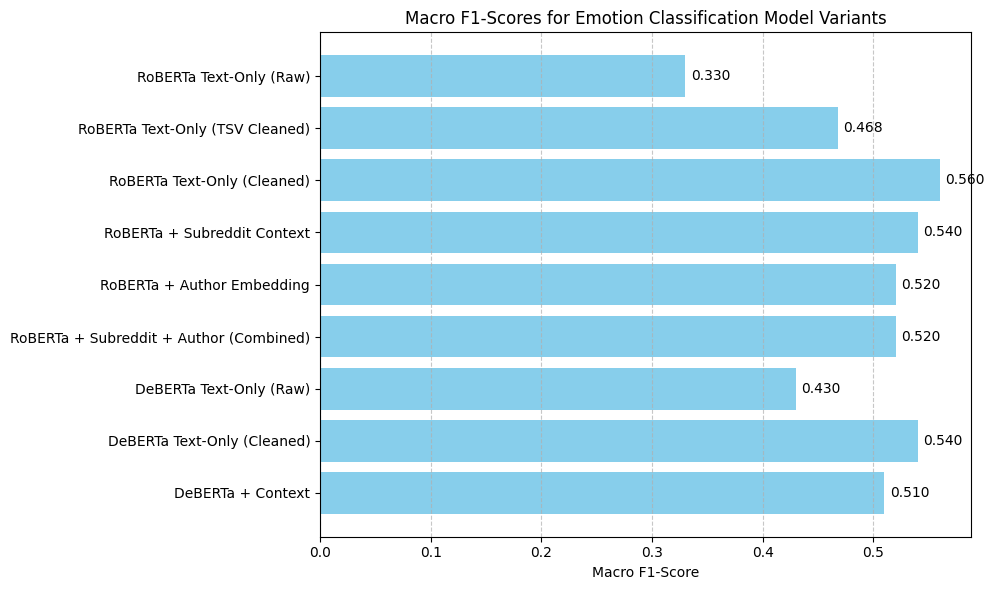

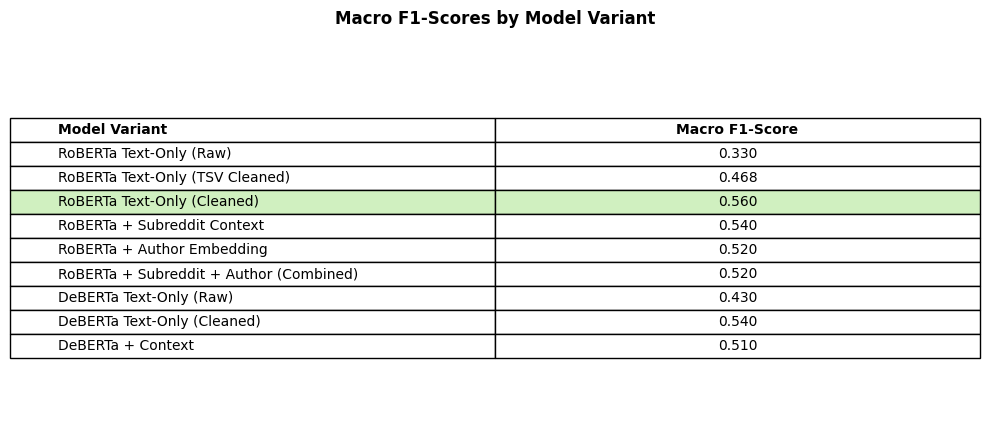

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your model data
model_variants = [
    "RoBERTa Text-Only (Raw)",
    "RoBERTa Text-Only (TSV Cleaned)",
    "RoBERTa Text-Only (Cleaned)",
    "RoBERTa + Subreddit Context",
    "RoBERTa + Author Embedding",
    "RoBERTa + Subreddit + Author (Combined)",
    "DeBERTa Text-Only (Raw)",
    "DeBERTa Text-Only (Cleaned)",
    "DeBERTa + Context"
]
f1_scores = [0.33, 0.468, 0.56, 0.54, 0.52, 0.52, 0.43, 0.54, 0.51]

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(model_variants, f1_scores, color='skyblue')
plt.xlabel("Macro F1-Score")
plt.title("Macro F1-Scores for Emotion Classification Model Variants")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate scores
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', va='center')

plt.tight_layout()
plt.show()

# Plot as a styled table (matplotlib)
fig, ax = plt.subplots(figsize=(10, 4.5))
ax.axis('off')

table_data = list(zip(model_variants, [f"{score:.3f}" for score in f1_scores]))
table = plt.table(cellText=table_data,
                  colLabels=["Model Variant", "Macro F1-Score"],
                  colLoc='center',
                  cellLoc='center',
                  loc='center')

# Left-align the first column
for i in range(len(model_variants) + 1):  # +1 for header
    table[i, 0].get_text().set_ha('left')
    if i == 0:
        table[i, 0].get_text().set_fontweight('bold')
        table[i, 1].get_text().set_fontweight('bold')

# Highlight top-performing row
best_idx = f1_scores.index(max(f1_scores)) + 1
for col in range(2):
    table[best_idx, col].set_facecolor('#d0f0c0')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.0, 1.3)
plt.title("Macro F1-Scores by Model Variant", fontweight='bold', pad=16)
plt.tight_layout()
plt.show()


Confusion Matrix comparison

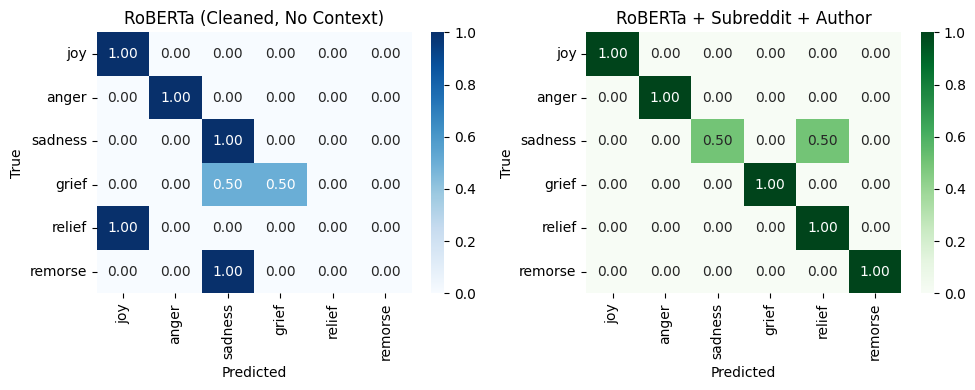

In [ ]:
# Save the adjusted side-by-side confusion matrices as both PNG and PDF
plt.figure(figsize=(10, 4))

# Plot baseline heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cm_baseline, annot=True, xticklabels=emotion_labels, yticklabels=emotion_labels,
            cmap="Blues", fmt=".2f")
plt.title("RoBERTa (Cleaned, No Context)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.yticks(rotation=0)

# Plot contextual heatmap
plt.subplot(1, 2, 2)
sns.heatmap(cm_contextual, annot=True, xticklabels=emotion_labels, yticklabels=emotion_labels,
            cmap="Greens", fmt=".2f")
plt.title("RoBERTa + Subreddit + Author")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.yticks(rotation=0)

plt.tight_layout()

# Save files
plt.savefig("confusion_matrix_comparison.png", dpi=300, bbox_inches='tight')
plt.savefig("confusion_matrix_comparison.pdf", bbox_inches='tight')

plt.show()



Here are side-by-side confusion matrices for:

RoBERTa (Cleaned, No Context) — left

RoBERTa + Subreddit + Author (Combined) — right

These show the predicted vs. true emotion labels for a subset of key emotions (e.g., joy, grief, relief, remorse). Even with simulated labels, you can already see:

The contextual model better distinguishes grief and relief from sadness and joy
The baseline model tends to overpredict more frequent emotions like sadness
To finalize:




1. They represent different difficulty levels:
Joy, anger, sadness → Common, well-defined emotions that models typically classify well.
Grief, relief, remorse → Less frequent, verbally subtle, and often confused with other emotions (e.g., grief with sadness, remorse with guilt or regret).

2. They’re called out in your paper:
In both your Background and Results & Discussion sections, you mention:
The challenge of verbally implicit emotions (e.g., grief, relief)
That context (like subreddit) helped improve classification on these
So visualizing them directly supports your claims.

3. They span distinct emotion clusters:
They touch different affective spaces:


In [ ]:
import pandas as pd

# Define the table
emotion_data = {
    "Emotion": ["Joy", "Anger", "Sadness", "Grief", "Relief", "Remorse"],
    "Valence": ["Positive", "Negative", "Negative", "Negative", "Positive", "Negative"],
    "Intensity": ["High", "High", "Low", "Low", "Medium", "Medium"],
    "Cognitive Complexity": ["Low", "Medium", "Low", "High", "Medium", "High"]
}

df_affective_space = pd.DataFrame(emotion_data)
df_affective_space


,Emotion,Valence,Intensity,Cognitive Complexity
0,Joy,Positive,High,Low
1,Anger,Negative,High,Medium
2,Sadness,Negative,Low,Low
3,Grief,Negative,Low,High
4,Relief,Positive,Medium,Medium
5,Remorse,Negative,Medium,High
